In [27]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import tensorflow as tf
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers as L
import keras
from keras.layers import *

In [28]:
DIRECTORY = '/kaggle/input/dogs-vs-cats/train'
CATEGORIES = ['cats','dogs']
IMG_SIZE = 224
train_data = []

In [29]:
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY,category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        train_data.append([img_arr, label])

In [30]:
len(train_data)

20000

In [31]:
random.shuffle(train_data)

In [32]:
X_train = []
y_train = []
for features, labels in train_data:
    X_train.append(features)
    y_train.append(labels)

In [33]:
DIRECTORY = '/kaggle/input/dogs-vs-cats/test'
CATEGORIES = ['cats','dogs']
IMG_SIZE = 224
test_data = []

In [34]:
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY,category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        test_data.append([img_arr, label])

In [35]:
len(test_data)

5000

In [36]:
X_test = []
y_test = []
for features, labels in test_data:
    X_test.append(features)
    y_test.append(labels)

In [37]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20000, 224, 224, 3), (5000, 224, 224, 3), (20000,), (5000,))

In [39]:
inputs = Input ((224,224,3))

x = (Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))(inputs)
x = (BatchNormalization()) (x)
x = (MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))(x)

x = (Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu')) (x)
x =(BatchNormalization()) (x)
x = (MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) (x)

x = (Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu')) (x)
x = (BatchNormalization()) (x)
x = (MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))(x)

x = (Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu')) (x)
x = (BatchNormalization()) (x)
x = (MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))(x)

x = (Conv2D(512,kernel_size=(3,3),padding='valid',activation='relu')) (x)
x = (BatchNormalization()) (x)
x = (MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))(x)

In [40]:
cnn = keras.Model(inputs,x)

In [41]:
cnn.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 10, 10, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,572,544 (6.00 MB)

 Trainable params: 1,570,560 (5.99 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [42]:
 model = tf.keras.Sequential([
     InputLayer((224,224,3)),
     cnn,
     Flatten(),
     Dense(128,activation='relu'),
     Dropout(0.6),
     Dense(64,activation='relu'),
     Dropout(0.6),
     Dense(1,activation='sigmoid')
 ])

In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_6 (Functional)       │ (None, 5, 5, 512)      │     1,572,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,219,393 (12.28 MB)

 Trainable params: 3,217,409 (12.27 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [44]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [45]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [46]:
filepath = "My_training_model_{epoch:02d}_{val_accuracy:.2f}.h5.keras"
checkpoint = ModelCheckpoint(filepath, monitor="val_accuracy",
                             verbose=1, save_best_only=True,
                             mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',factor=1e-1, patience=5,
                              verbos=1)
callbacks = [checkpoint, reduce_lr]

In [47]:
history = model.fit(X_train, y_train,
                    validation_data=[X_test, y_test],
                    callbacks=callbacks,
                    epochs=50,batch_size=8)

Epoch 1/50
2499/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5347 - loss: 0.9554
Epoch 1: val_accuracy improved from -inf to 0.57560, saving model to My_training_model_01_0.58.h5.keras
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.5347 - loss: 0.9553 - val_accuracy: 0.5756 - val_loss: 0.6437 - learning_rate: 1.0000e-04
Epoch 2/50
2498/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5563 - loss: 0.6854
Epoch 2: val_accuracy improved from 0.57560 to 0.66560, saving model to My_training_model_02_0.67.h5.keras
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.5563 - loss: 0.6854 - val_accuracy: 0.6656 - val_loss: 0.5996 - learning_rate: 1.0000e-04
Epoch 3/50
2497/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5999 - loss: 0.6673
Epoch 3: val_accuracy improved from 0.66560 to 0.71920, saving model to My_training_model_03_0.72.h5.keras
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.5999 - loss: 0.6673 - val_accuracy: 0.7192 - val_loss: 0.5

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


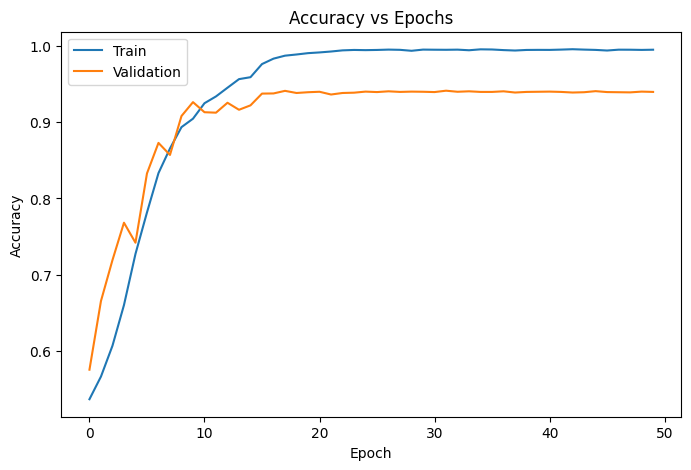

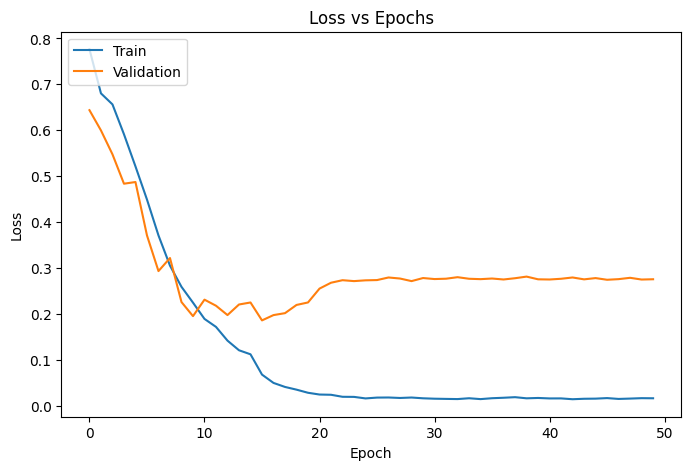

In [48]:
print(history.history.keys())
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [75]:
re_model = tf.keras.models.load_model('My_training_model_01_0.58.h5.keras')

In [76]:
re_model.evaluate(X_test, y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8382 - loss: 0.6315


[0.6437101364135742, 0.5756000280380249]